<a href="https://colab.research.google.com/github/ashw6/stml-b40/blob/main/sml_assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM Accuracy: 0.7692307692307693
KNN Accuracy: 0.7692307692307693
Logistic Regression Accuracy: 0.7692307692307693


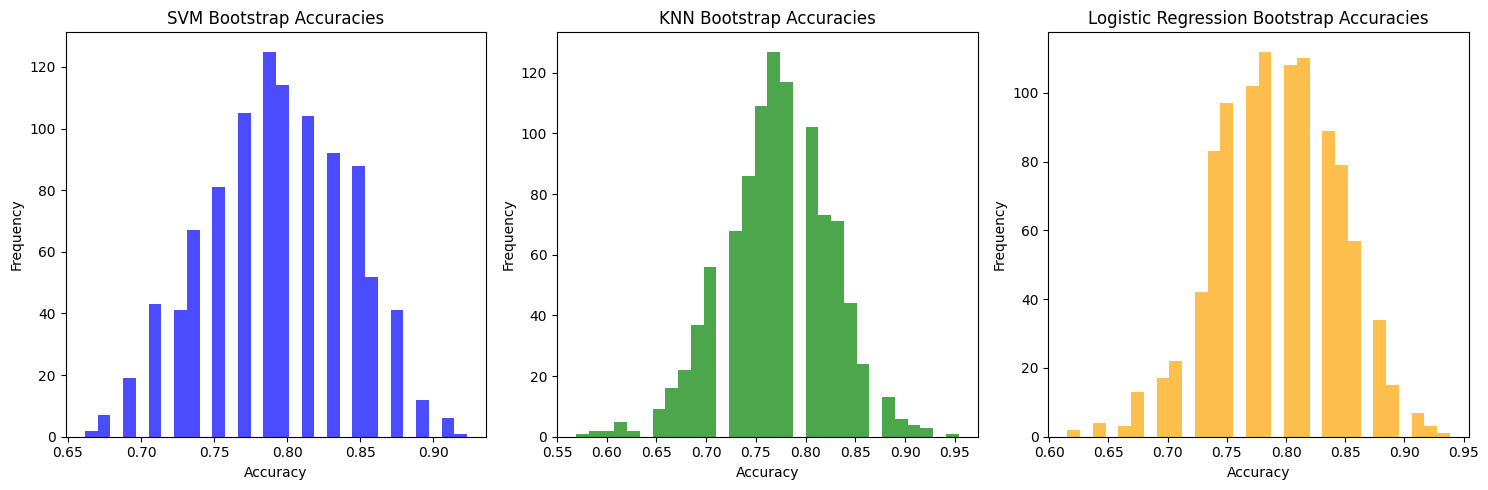

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# Load the dataset
file_path = '/content/breast_cancer_survival.csv'
data = pd.read_csv(file_path)

# Drop irrelevant columns
data = data.drop(columns=['Date_of_Surgery', 'Date_of_Last_Visit'])

# Handle missing values in the target variable
data = data.dropna(subset=['Patient_Status'])

# Encode target variable: 'Alive' -> 1, 'Dead' -> 0
data['Patient_Status'] = data['Patient_Status'].map({'Alive': 1, 'Dead': 0})

# One-hot encode categorical features
categorical_columns = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Separate features and target
features = data.drop(columns=['Patient_Status'])
target = data['Patient_Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
svm_model = SVC(kernel='linear', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the models
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)

# Make predictions
svm_preds = svm_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
logreg_preds = logreg_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)
logreg_accuracy = accuracy_score(y_test, logreg_preds)

print(f"SVM Accuracy: {svm_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")
print(f"Logistic Regression Accuracy: {logreg_accuracy}")

# Bootstrapping function
def bootstrap_accuracy(model, X, y, n_iterations=1000):
    accuracies = []
    for _ in range(n_iterations):
        # Sample data with replacement
        X_resampled, y_resampled = resample(X, y, replace=True)
        # Split resampled data into training and testing sets
        X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
            X_resampled, y_resampled, test_size=0.2, random_state=42
        )
        # Train the model
        model.fit(X_train_resampled, y_train_resampled)
        # Evaluate accuracy
        predictions = model.predict(X_test_resampled)
        accuracies.append(accuracy_score(y_test_resampled, predictions))
    return accuracies

# Bootstrap accuracies for each model
svm_accuracies = bootstrap_accuracy(SVC(kernel='linear', random_state=42), features, target)
knn_accuracies = bootstrap_accuracy(KNeighborsClassifier(n_neighbors=5), features, target)
logreg_accuracies = bootstrap_accuracy(LogisticRegression(max_iter=1000, random_state=42), features, target)

# Plot bootstrap distributions
plt.figure(figsize=(15, 5))

# SVM
plt.subplot(1, 3, 1)
plt.hist(svm_accuracies, bins=30, color='blue', alpha=0.7)
plt.title("SVM Bootstrap Accuracies")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")

# KNN
plt.subplot(1, 3, 2)
plt.hist(knn_accuracies, bins=30, color='green', alpha=0.7)
plt.title("KNN Bootstrap Accuracies")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")

# Logistic Regression
plt.subplot(1, 3, 3)
plt.hist(logreg_accuracies, bins=30, color='orange', alpha=0.7)
plt.title("Logistic Regression Bootstrap Accuracies")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
